<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">

<h1 align=center>Logistic Regression Training Negative Log likelihood (Cross-Entropy )<font size = 5>
   </font></h1> 

# Table of Contents
In this lab, you will see what happens when you use the Cross-Entropy or total loss function using random initialization for a parameter value.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data </a></li>
<li><a href="#ref1">Create the Model and Cost Function the Pytorch way </a></li>
<li><a href="#ref2">Train the Model: Batch Gradient Descent</a></li>

<br>
<p></p>
Estimated Time Needed: <strong>30 min</strong>
</div>

<hr>

Import the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

Helper functions 

The class <code>plot_error_surfaces</code> is just to help you visualize the data space and the parameter space during training and has nothing to do with Pytorch. 

In [3]:
class plot_error_surfaces(object):
    def __init__(self,w_range, b_range,X,Y,n_samples=50,go=True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z=np.zeros((30,30))
        count1=0
        self.y=Y.numpy()
        self.x=X.numpy()
        for w1,b1 in zip(w,b):
            count2=0
            for w2,b2 in zip(w1,b1):
                
  
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                count2 +=1
    
            count1 +=1
        self.Z=Z
        self.w=w
        self.b=b
        self.W=[]
        self.B=[]
        self.LOSS=[]
        self.n=0
        if go==True:
            plt.figure()
            plt.figure(figsize=(7.5,5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    def get_stuff(self,model,loss):
        self.n=self.n+1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
        
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c='r', marker='x',s=200,alpha=1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x,self.y,'ro',label="training points")
        plt.plot(self.x,self.W[-1]*self.x+self.B[-1],label="estimated line")
        plt.plot(self.x,1 / (1 + np.exp(-1*(self.W[-1]*self.x+self.B[-1]))),label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: '+str(self.n))
        plt.legend()
        plt.show()
        plt.subplot(122)
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W,self.B,c='r', marker='x')
        plt.title('Loss Surface Contour Iteration'+str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.legend()

In [4]:
torch.manual_seed(0)

In [5]:
def PlotStuff(X,Y,model,epoch,leg=True):
    plt.plot(X.numpy(),model(X).detach().numpy(),label='epoch '+str(epoch))
    plt.plot(X.numpy(),Y.numpy(),'r')
    if leg==True:
        plt.legend()
    else:
        pass

<a id="ref0"></a>
<h2 align=center>Get Some Data </h2>

In [6]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-1,1,0.1).view(-1,1)
        self.y=-torch.zeros(self.x.shape[0],1)
        self.y[self.x[:,0]>0.2]=1
        self.len=self.x.shape[0]
    def __getitem__(self,index):      
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [7]:
data_set=Data()

In [8]:
trainloader=DataLoader(dataset=data_set,batch_size=3)

<a id="ref1"></a>
<h2 align=center>Create the Model and Total Loss Function (cost) </h2>

Create a custom module for logistic regression:

In [9]:
class logistic_regression(nn.Module):
    def __init__(self,n_inputs):
        super(logistic_regression,self).__init__()
        self.linear=nn.Linear(n_inputs,1)
    def forward(self,x):
        yhat=torch.sigmoid(self.linear(x))
        return yhat

Create a logistic regression object or model: 

In [10]:
model=logistic_regression(1)

Replace the random initialized variable values. Theses random initialized variable values did convergence for the RMS Loss but will converge for the Cross-Entropy Loss.

In [11]:
model.state_dict() ['linear.weight'].data[0]=torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0]=torch.tensor([[-10]])

Create a <code> plot_error_surfaces</code> object to visualize the data space and the parameter space during training:

<Figure size 432x288 with 0 Axes>

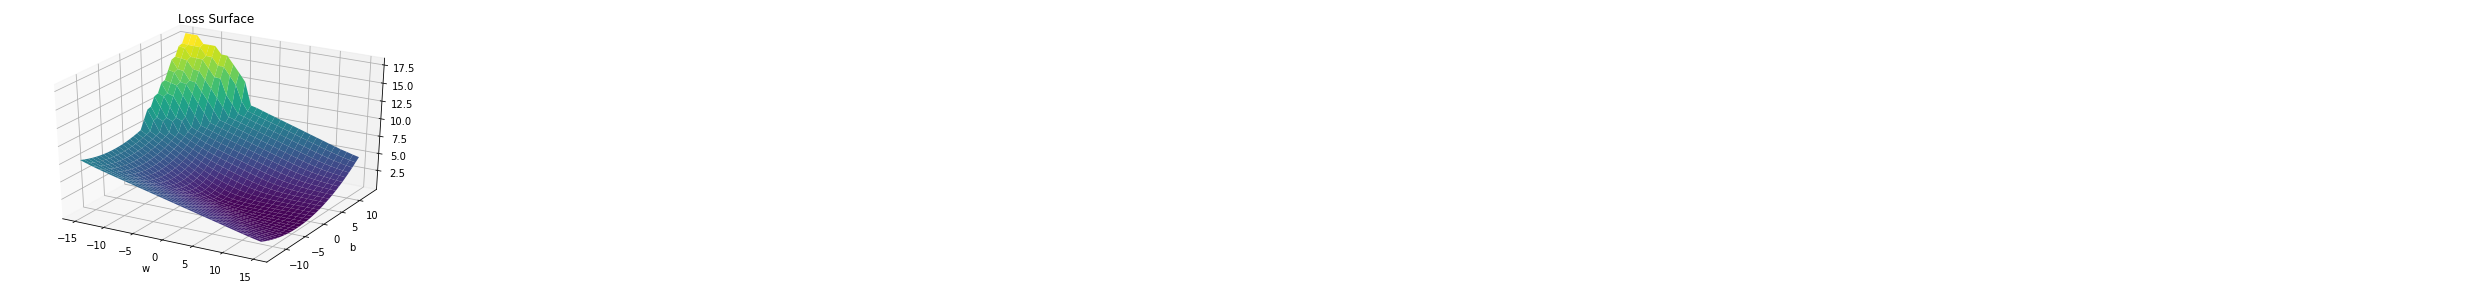

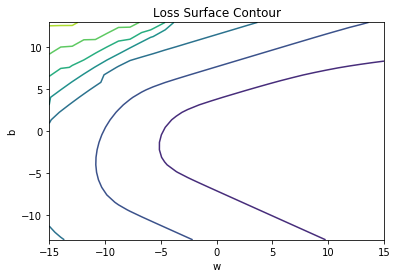

In [12]:
get_surface=plot_error_surfaces(15,13,data_set[:][0],data_set[:][1],30)

Define the cost or criterion function: 

In [13]:
#build in  criterion
#criterion=nn.BCELoss()
def criterion(yhat,y):
    out=-1*torch.mean(y*torch.log(yhat) +(1-y)*torch.log(1-yhat))
    return out

Create a dataloader object: 

In [14]:
learning_rate=2

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

<a id="ref2"></a>
<h2 align=center>Train the Model via Batch Gradient Descent </h2>

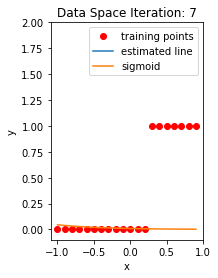

No handles with labels found to put in legend.


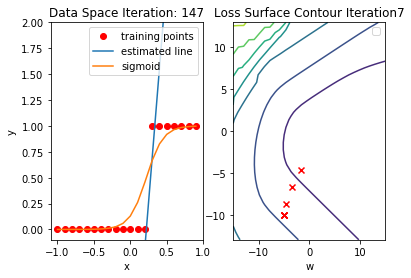

No handles with labels found to put in legend.


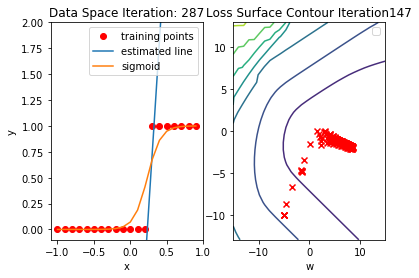

No handles with labels found to put in legend.


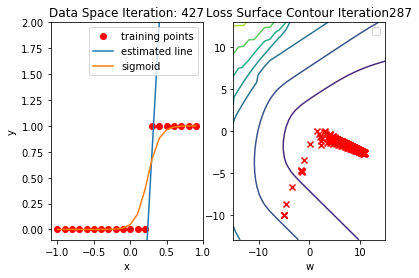

No handles with labels found to put in legend.


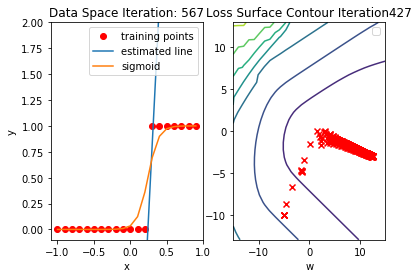

No handles with labels found to put in legend.


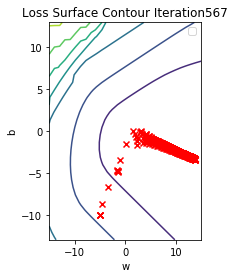

In [15]:
for epoch in range(100):
    
    for x,y in trainloader:
        #make a prediction 
        yhat= model(x)
        #calculate the loss
        loss = criterion(yhat, y)
        #clear gradient
        optimizer.zero_grad()
        #Backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        #the step function on an Optimizer makes an update to its parameters
        optimizer.step()
        #for plotting
        get_surface.get_stuff(model,loss.tolist())
        #plot every 20 iterataions
    if epoch%20==0:
        get_surface.plot_ps()

Get the actual class of each sample and calculate the accuracy on the test data:

In [16]:
yhat=model(data_set.x)
lable=yhat>0.5
print(torch.mean((lable==data_set.y.type(torch.ByteTensor)).type(torch.float)))

tensor(1.)


The accuracy is perfect.

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).